### The Scatter Plot:

From the scatter plot, we can find out five things about the correlation between the departure delay and arrival delay:

- *Direction:* Positive or negative

- *Form:* Linear or non-linear

- *Regression line* 

- *Strength:* Weak, moderate, strong

- *Outliers:* Extreme values

The basic scatter plot is plotted with two continuous variables: response and independent variable, (y, x). The y is always plotted on the vertical axis and x is on horizontal axis. The horizontal axis of a scatterplot always increases to the right and the vertical axis always increases upward. 

In [1]:
import os

import pandas as pd
import numpy as np

In [2]:
print(os.getcwd())

C:\Users\Owner\Desktop\Data Visualization


In [3]:
Airlines = pd.read_csv('Air2008_copy.csv')

In [4]:
Airlines.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524733 entries, 0 to 1524732
Data columns (total 29 columns):
Year                 1524733 non-null int64
Month                1524733 non-null int64
DayofMonth           1524733 non-null int64
DayOfWeek            1524733 non-null int64
DepTime              1524733 non-null float64
CRSDepTime           1524733 non-null int64
ArrTime              1524733 non-null float64
CRSArrTime           1524733 non-null int64
UniqueCarrier        1524733 non-null object
FlightNum            1524733 non-null int64
TailNum              1524733 non-null object
ActualElapsedTime    1524733 non-null float64
CRSElapsedTime       1524733 non-null float64
AirTime              1524733 non-null float64
ArrDelay             1524733 non-null float64
DepDelay             1524733 non-null float64
Origin               1524733 non-null object
Dest                 1524733 non-null object
Distance             1524733 non-null int64
TaxiIn               1524733 non-

In [5]:
Air2008 = Airlines.sample(frac = 0.01, random_state = 99)

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

### The scatterplot:

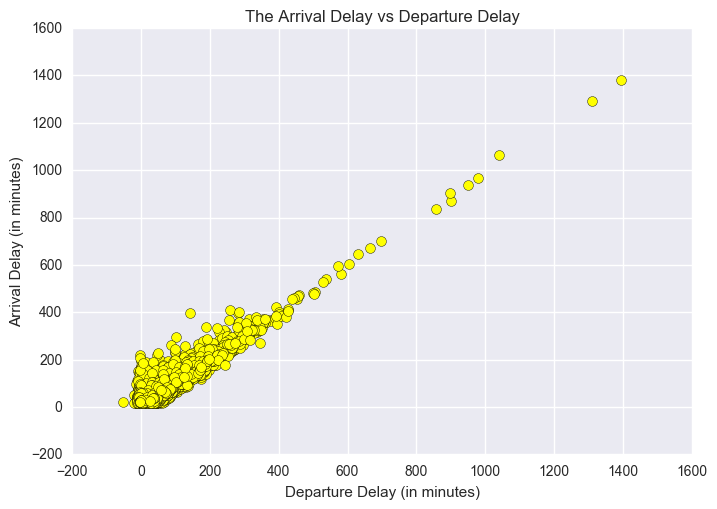

In [9]:
plt.scatter(x = Air2008.DepDelay, y = Air2008.ArrDelay, s = 50, c = 'yellow', marker = 'o')

plt.xlabel('Departure Delay (in minutes)')
plt.ylabel('Arrival Delay (in minutes)')
plt.title('The Arrival Delay vs Departure Delay');

### The scatterplot with the regression line:

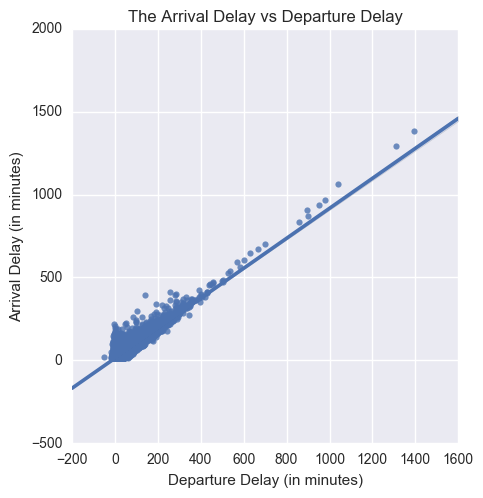

In [29]:
sns.lmplot(y = 'ArrDelay', x = 'DepDelay', data = Air2008)

plt.xlabel('Departure Delay (in minutes)')
plt.ylabel('Arrival Delay (in minutes)')
plt.title('The Arrival Delay vs Departure Delay');

### The scatterplot with the regression line:

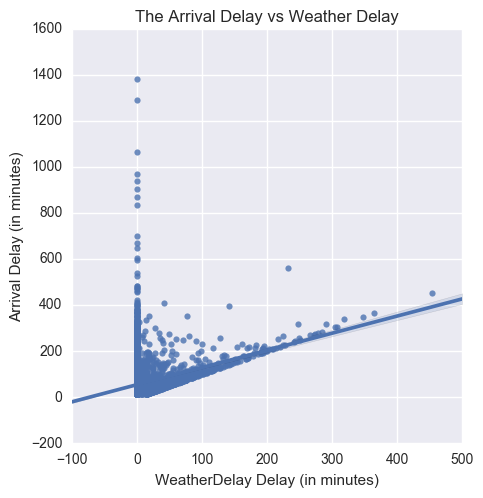

In [30]:
sns.lmplot(y = 'ArrDelay', x = 'WeatherDelay', data = Air2008)

plt.xlabel('WeatherDelay Delay (in minutes)')
plt.ylabel('Arrival Delay (in minutes)')
plt.title('The Arrival Delay vs Weather Delay');

In [31]:
from numpy import *
from scipy.interpolate import *

In [32]:
p1 = polyfit(Air2008.ArrDelay, Air2008.DepDelay, 1)

### The scatterplot with the regression line:

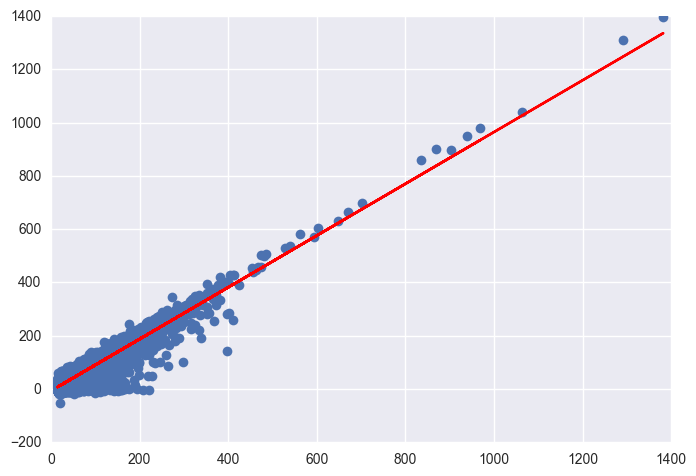

In [33]:
plt.plot(Air2008.ArrDelay, Air2008.DepDelay, 'o')
plt.plot(Air2008.ArrDelay, polyval(p1, Air2008.ArrDelay), 'r-');

In [34]:
yfit = p1[0] * Air2008.DepDelay + p1[1]
yresid = Air2008.ArrDelay - yfit

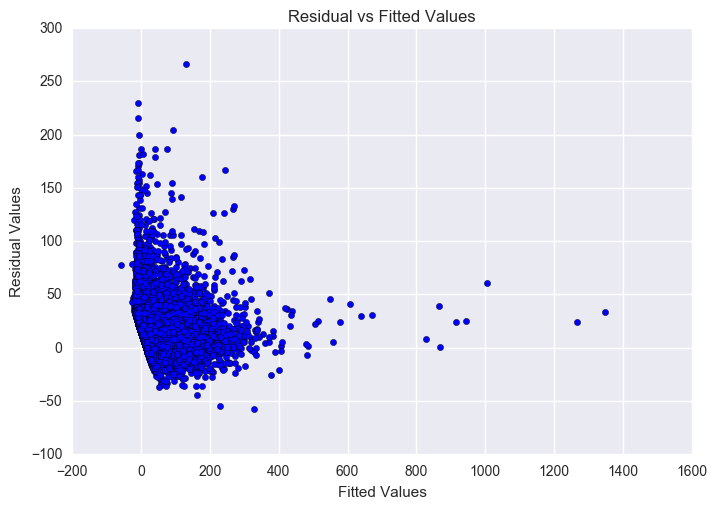

In [35]:
plt.scatter(yfit, yresid)

plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.title('Residual vs Fitted Values');

In [37]:
import pylab

import scipy.stats as stats

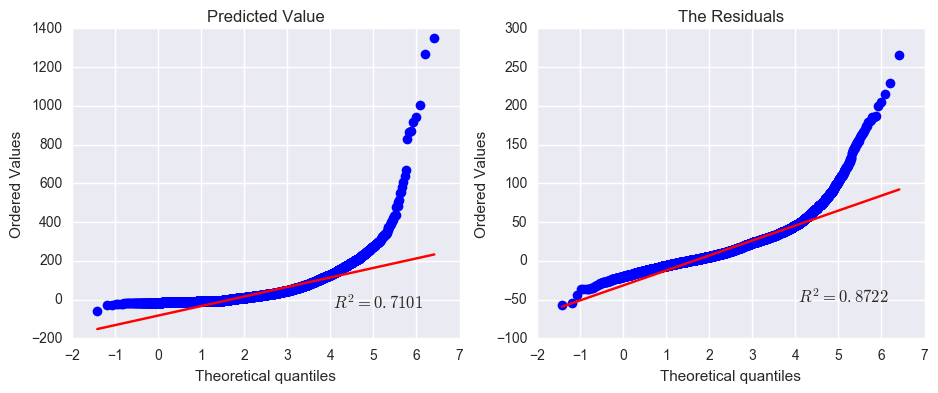

In [38]:
fig = plt.figure(figsize = (11, 4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(yfit, dist = 'norm', plot = ax, sparams = (2.5), rvalue = True)
ax.set_title('Predicted Value')

stats.probplot(yresid, dist = 'norm', plot = ax1, sparams = (2.5), rvalue = True)
ax1.set_title('The Residuals');